In [6]:
import pandas as pd

In [7]:
# Import data 
final_db = pd.read_csv('../01_data/final_data.csv')

In [8]:
final_db.head

<bound method NDFrame.head of        country  country2  IN02  HH02  EUD01_01  EUD01_02  EUD01_03  EUD01_04  \
0          1.0       1.0   8.0  37.0       1.0       1.0       0.0       0.0   
1          1.0       1.0   8.0  30.0       0.0       0.0       0.0       0.0   
2          1.0       1.0   8.0  35.0       0.0       0.0       0.0       0.0   
3          1.0       1.0   8.0  42.0       1.0       1.0       1.0       0.0   
4          1.0       1.0   8.0  39.0       0.0       0.0       0.0       0.0   
...        ...       ...   ...   ...       ...       ...       ...       ...   
13401     28.0      28.0   8.0  58.0       0.0       0.0       0.0       0.0   
13402     28.0      28.0   8.0  46.0       0.0       0.0       0.0       0.0   
13403     28.0      28.0   8.0  40.0       0.0       1.0       0.0       1.0   
13404     28.0      28.0   8.0  37.0       0.0       0.0       0.0       0.0   
13405     28.0      28.0   8.0  36.0       0.0       0.0       0.0       0.0   

       EU

In [9]:
# Define the target variable
discrimination_columns = ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 'EUD01_05', 'EUD01_06', 
                           'EUD01_07', 'EUD01_08']

# Define a function to check if discrimination occurred
def check_discrimination(row):
     for col in discrimination_columns:
         if row[col] == 1:
             return 1  # Discrimination occurred, return 1
     return 0  # No discrimination occurred, return 0

# Create the binary discrimination variable
final_db['discrimination_occurred'] = final_db.apply(check_discrimination, axis=1)

# Display the distribution of the binary discrimination variable
print(final_db['discrimination_occurred'].value_counts())

discrimination_occurred
0    8236
1    5170
Name: count, dtype: int64


In [10]:
final_db.head()

,country,country2,IN02,HH02,EUD01_01,EUD01_02,EUD01_03,EUD01_04,EUD01_05,EUD01_06,...,PB10_2_mod,DHO01_mod,HH03_mod,DE06_mod,DHE04_mod,DHE03_mod,DHE02_mod,DO27_mod,DO24_mod,discrimination_occurred
0,1.0,1.0,8.0,37.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,1,1,3.0,0,1,0,1
1,1.0,1.0,8.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,1,3.0,0,1,0,0
2,1.0,1.0,8.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,3.0,0,1,0,0
3,1.0,1.0,8.0,42.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,1,1.0,1,1,0,1
4,1.0,1.0,8.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,3.0,0,1,0,0


In [11]:
# Counting the missing values
final_db.isna().sum() / len(final_db) * 100

country                    0.0
country2                   0.0
IN02                       0.0
HH02                       0.0
EUD01_01                   0.0
EUD01_02                   0.0
EUD01_03                   0.0
EUD01_04                   0.0
EUD01_05                   0.0
EUD01_06                   0.0
EUD01_07                   0.0
EUD01_08                   0.0
EUD01_09                   0.0
EUD01_96                   0.0
EUD01_97                   0.0
EUD01_99                   0.0
VV10_2                     0.0
activ                      0.0
id                         0.0
VH01a_1_mod                0.0
VH01a_2_mod                0.0
VH01a_3_mod                0.0
VH01a_4_mod                0.0
VH01a_5_mod                0.0
RA03_1_mod                 0.0
RA03_2_mod                 0.0
RA03_3_mod                 0.0
SI02_inc_work              0.0
SI02_inc_ben               0.0
SI06_mod                   0.0
HLS02_mod                  0.0
DHE01_mod                  0.0
PB11_mod

In [51]:
# Feature Importance

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Our target variable is discrimination occured 

# Separate features (X) and target variable (y)
X = final_db.drop(['discrimination_occurred', 'EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 
                                     'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08', 'EUD01_09'], axis=1)
y = final_db['discrimination_occurred']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Print the accuracy of the Random Forest model
print("Accuracy for Random Forest:", random_forest.score(X_test_scaled, y_test))

# Initialize and train the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

# Print the accuracy of the Logistic Regression model
print("Accuracy for Logistic Regression:", logistic_regression.score(X_test_scaled, y_test))

# Initialize and train the XGBoost classifier
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train_scaled, y_train)

# Print the accuracy of the XGBoost model
print("Accuracy for XGBoost:", xgboost.score(X_test_scaled, y_test))

Accuracy for Random Forest: 0.7292391844853306
Accuracy for Logistic Regression: 0.7212829438090502
Accuracy for XGBoost: 0.7237692690203879


In [ ]:
### The Random Forest classifier achieved the highest accuracy among the three models.

In [23]:
### Cross Over Validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define the classifiers
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression()
xgb_classifier = XGBClassifier()

# Perform cross-validation for each classifier
rf_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
lr_scores = cross_val_score(lr_classifier, X_train_scaled, y_train, cv=5)
xgb_scores = cross_val_score(xgb_classifier, X_train_scaled, y_train, cv=5)

# Print the mean accuracy for each classifier
print("Random Forest Cross-Validation Accuracy:", rf_scores.mean())
print("Logistic Regression Cross-Validation Accuracy:", lr_scores.mean())
print("XGBoost Cross-Validation Accuracy:", xgb_scores.mean())


Random Forest Cross-Validation Accuracy: 0.7289002888745253
Logistic Regression Cross-Validation Accuracy: 0.7231456879541709
XGBoost Cross-Validation Accuracy: 0.7222927526913723


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Train Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

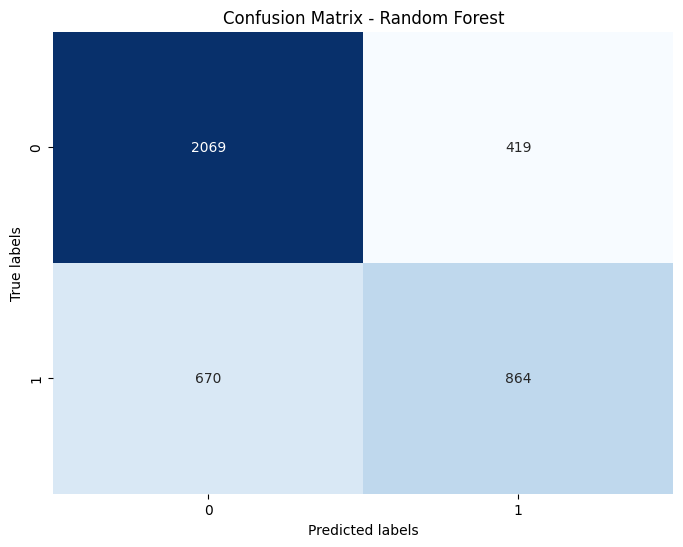

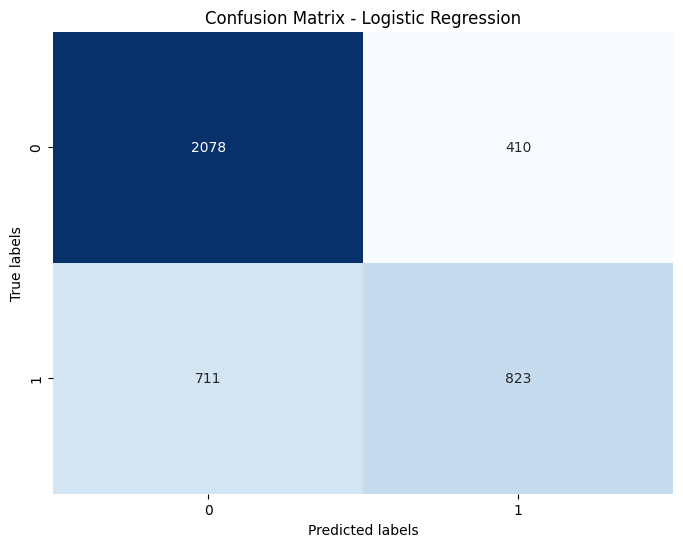

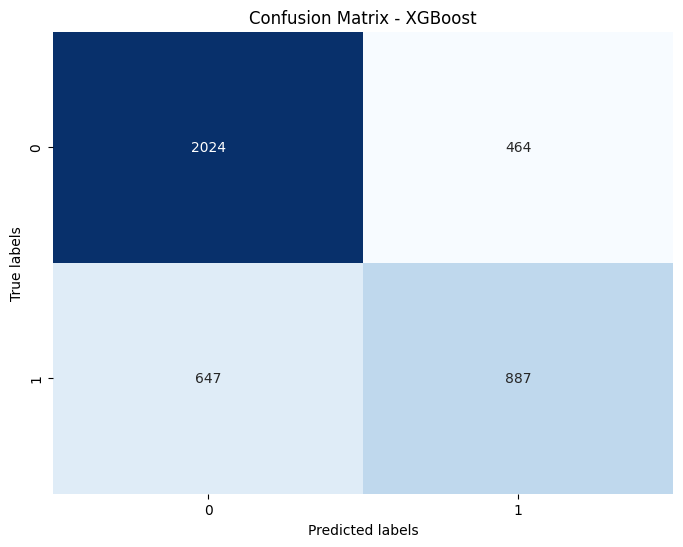

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions for each model
y_pred_rf = rf.predict(X_test_scaled)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)

# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Compute confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Plot confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [ ]:
### Random Forest for Feature Selection

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Apply one-hot encoding to categorical variables
X_train_encoded = pd.get_dummies(X_train)

rf = RandomForestClassifier(random_state=42)

# Now, fit the Random Forest classifier with the encoded data
rf.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

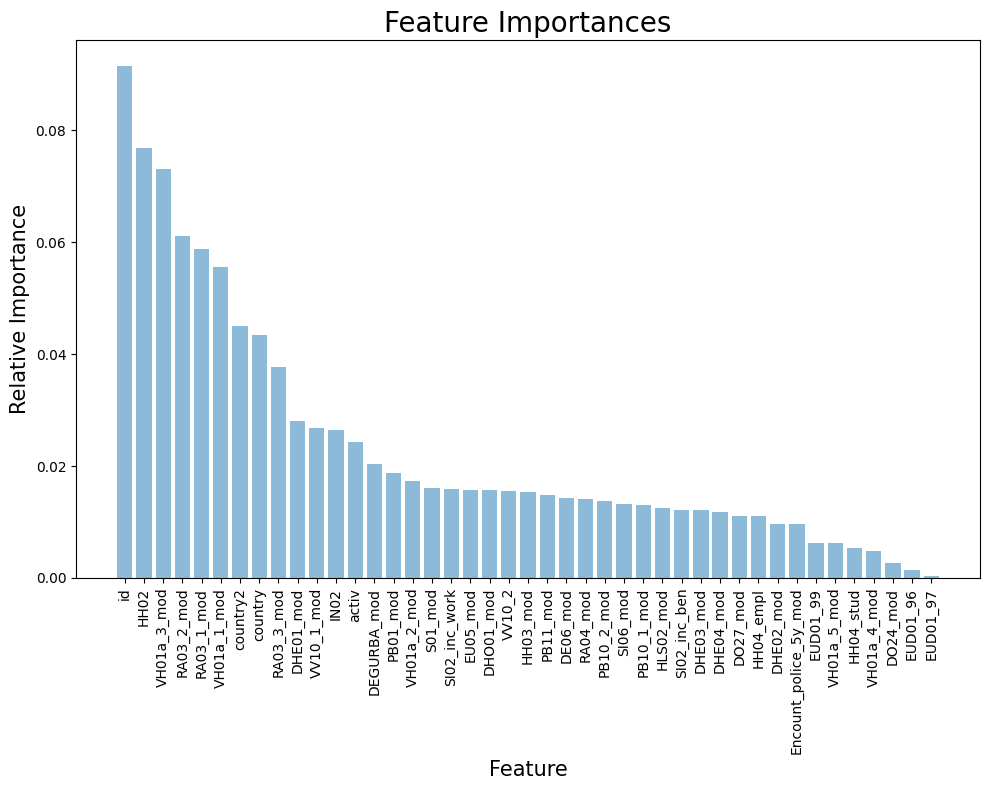

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rf is your trained RandomForestClassifier
feature_importances = rf.feature_importances_

# Drop the specified columns from the DataFrame before extracting column names
dropped_columns = ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 
                   'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08', 'EUD01_09']

feature_names = final_db.drop(['discrimination_occurred'] + dropped_columns, axis=1).columns

# Sort the feature importances in descending order and get their indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
## Hyperparameter Tuning and Cross-Validation

In [59]:
from sklearn.model_selection import GridSearchCV

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
cv_rf.fit(X_train_encoded, y_train) 
#cv_rf is the model after GridSearchCV 
#has found the best parameters and refitted the model using these parameters on the entire training set

# Best parameters
print("Best parameters:", cv_rf.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
